In [1]:
import dlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import hypot


%matplotlib inline

image : (168, 300, 3)     2 faces detected: 


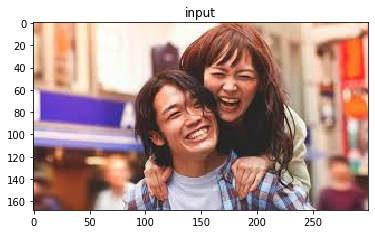

In [2]:
faceDetector = dlib.get_frontal_face_detector() #faceDetector 정의
landmarkDetector = dlib.shape_predictor("data/models/shape_predictor_68_face_landmarks.dat") #landmarkDetector에 68 face_landmark 대입
im = cv2.imread('data/images/laughing-couple.jpg')  #이미지 로드
plt.imshow(im[:,:,::-1]); plt.title('input')
faceRects = faceDetector(im, 1)
print("image :", im.shape, "    {} faces detected: ".format(len(faceRects))) #이미지 출력 및 얼굴 검출

In [ ]:
image = im.copy()
sub_face = im.copy() #이미지 복사

for i in range(0, len(faceRects)):        #얼굴 검출 수 만큼 for 문돌려 다음 문장 실행
    x, y, w, h = [faceRects[i].left(),faceRects[i].top(),faceRects[i].right(),faceRects[i].bottom()] #x,y,w,h에 각각 faceRect 대입
    print('face {} : ({},{})-({},{})'.format(i, x, y, w+1, h+1))
    
    im_face = image[y:h+1, x:w+1]
    blur=cv2.GaussianBlur(im_face, (101, 101), 0) #blur 처리 값 입력
    
    plt.figure(figsize=(6,3))
    plt.subplot(121);plt.imshow(im_face[:,:,::-1])
    image[y:h+1, x:w+1] = blur #blur 처리
    
    
    cv2.rectangle(sub_face, (x,y), (w,h), (0,0,255), 1) #사각형을 통한 검출
    plt.subplot(122);plt.imshow(blur[:,:,::-1])
    
plt.figure(figsize=(10,10))
plt.subplot(211); plt.imshow(sub_face[:,:,::-1]); plt.title('faces')
plt.subplot(212); plt.imshow(image[:,:,::-1]); plt.title('face blur')

In [12]:
def mid_smile(x, y):  #mid_smile을 통해 중앙값 검출
    return int((x.x + y.x)/2), int((x.y + y.y)/2)

def smile_ratio(lips_p, landmarks): #smile ratio를 통해 각 대응점에 대해 길이 및 비율을 구하여 반환하는  함수
    x = (landmarks.part(lips_p[12]).x, landmarks.part(lips_p[12]).y)
    y = (landmarks.part(lips_p[16]).x, landmarks.part(lips_p[16]).y)
    w = mid_smile(landmarks.part(lips_p[13]), landmarks.part(lips_p[14]))
    h = mid_smile(landmarks.part(lips_p[19]), landmarks.part(lips_p[18]))
    w_lenth = hypot((x[0] - y[0]), (x[1] - y[1]))
    h_lenth = hypot((w[0] - h[0]), (w[1] - h[1]))
    
    if h_lenth / w_lenth <=0.6:
        isSmiling=True
    else:
        isSmiling=False
    
    return isSmiling


In [ ]:
lips_p = [48, 49, 50, 51, 52, 53, 54, 55,
                  56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67] #lip의 대응점 landmark 정의


im_copy = im.copy() #사진 복사

for i in range(0, len(faceRects)):
    landmarks = landmarkDetector(im_copy, faceRects[i])
    if smile_ratio(lips_p, landmarks): #smile ratio면 다음 문장 실행
        cv2.putText(im_copy, "Smile", (landmarks.part(54).x , landmarks.part(54).y ), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 1, cv2.LINE_AA)
        print('{}-th face.'.format(i), '   text at x, y : {}'.format((landmarks.part(54).x , landmarks.part(54).y)))
        
plt.figure(figsize=(10,10))
plt.imshow(im_copy[:,:,::-1]); plt.title("result")

image : (828, 860, 3) uint8
image_gray : (828, 860) uint8
mask : (828, 860, 3) uint8 0 255
828 860
0-th face. emoji x,y,w,h : 185 71 14 14
1-th face. emoji x,y,w,h : 158 93 11 11


Text(0.5, 1.0, 'result')

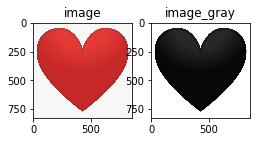

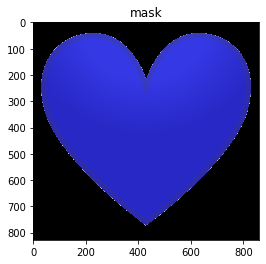

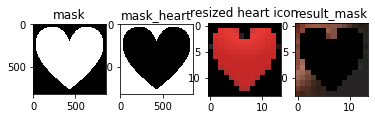

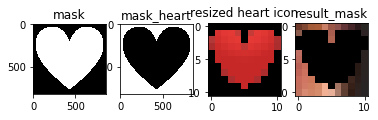

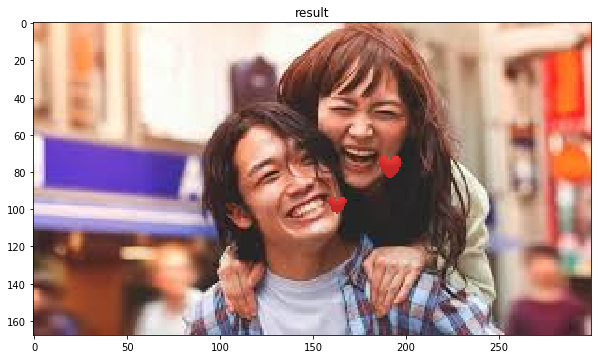

In [13]:
lips_p = [48, 49, 50, 51, 52, 53, 54, 55,
                  56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67] #입술의 대응점 포인트 정의
im_copy = im.copy()
image = cv2.imread('data/images/heart-icon.png') #heart 아이콘 불러와줌
print('image :', image.shape, image.dtype)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #image_gray를 GRAY 채널로 변환

print('image_gray :', image_gray.shape, image_gray.dtype)
plt.imshow(image[:,:,::-1])

plt.subplot(131); plt.imshow(image[:,:,::-1]); plt.title('image')
plt.subplot(132); plt.imshow(image_gray, 'gray'); plt.title('image_gray')
plt.figure()
_,mask = cv2.threshold(image_gray, 200, 255, cv2.THRESH_BINARY_INV) #명암 값 경계 설정
mask= cv2.merge((mask, mask, mask)) #mask 를 merge 시켜줌

print('mask :', mask.shape, mask.dtype, mask.min(), mask.max())
plt.imshow(mask)
plt.title('mask')
image_mask=cv2.bitwise_and(image,mask)
r_heart=(1-mask/255) #mask를 역마스크 시켜줌
eh,ew=image_mask.shape[:2] 
print(eh,ew)

plt.imshow(image_mask)
plt.title('mask')

for i in range(0, len(faceRects)):
    landmarks = landmarkDetector(im_copy, faceRects[i]) #landmarks 값 지정
    if smile_ratio(lips_p, landmarks): #위에 정의한 smile_ratio 값에 따라 코드 실행
        x = landmarks.part(lips_p[6]).x
        y = landmarks.part(lips_p[6]).y
        h = landmarks.part(lips_p[9]).y-landmarks.part(lips_p[3]).y
        w = np.int(ew * (h / eh)) #각각 x,y, 너비, 높이 값 지정
        
        
        e_resize = cv2.resize(image_mask, (w, h)) #각 비율만큼 resize 시켜줌
        e_mask=cv2.resize(r_heart,(w,h)) #각 비율만큼 resize 시켜줌
        
        print('{}-th face.'.format(i), 'emoji x,y,w,h :', x, y, w, h)
        
        result_mask = im_copy[y:y+h, x:x+w] * (e_mask)
        result_mask = result_mask.astype(np.uint8)
        
        plt.figure()
        plt.subplot(141); plt.imshow(mask[:,:,::-1]); plt.title('mask')
        plt.subplot(142); plt.imshow(r_heart[:,:,::-1]); plt.title('mask_heart')
        plt.subplot(143); plt.imshow(e_resize[:,:,::-1]); plt.title('resized heart icon')
        plt.subplot(144); plt.imshow(result_mask[:,:,::-1]); plt.title('result_mask')
        
        im_copy[y:y+h, x:x+w] =  cv2.addWeighted(result_mask, 1, e_resize, 1, 0)  #최종 합성
        
plt.figure(figsize=(10,10))
plt.imshow(im_copy[:,:,::-1]); plt.title("result")        

s_mask, s_masked_image : (480, 960, 3) (480, 960, 3)


Text(0.5, 1.0, 'result')

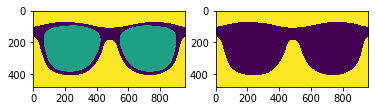

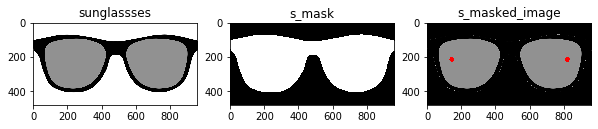

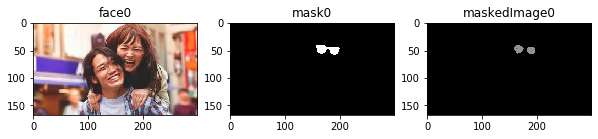

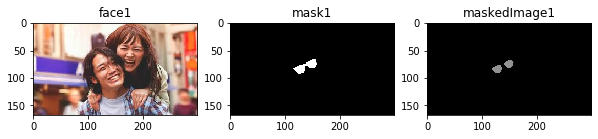

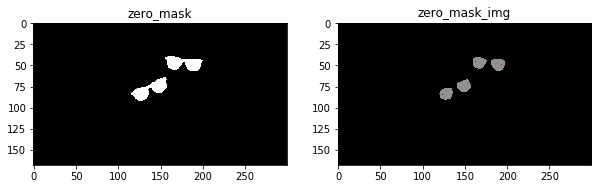

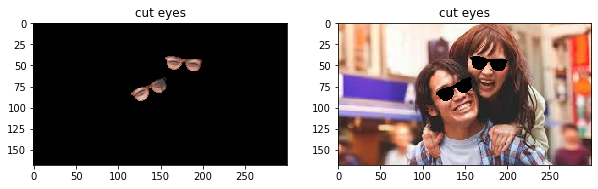

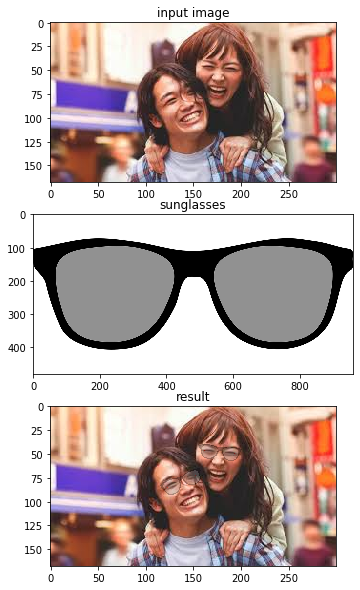

In [33]:
r_points = [42, 43, 44, 45, 46, 47]
l_points = [36, 37, 38, 39, 40, 41] #눈의 좌표 배열 지정


im_copy = im.copy() #사진 복사
h, w = im_copy.shape[:2] #h, w 값 정의

zero_mask = np.zeros_like(im_copy)
zero_mask_img = np.zeros_like(im_copy)  #다음 크기와 같은 zero 마스크 생성

# sunglasses 파일 읽어 마스크 구함
s_image = cv2.imread('data/images/sunglasses.png') 

gray = cv2.cvtColor(s_image, cv2.COLOR_BGR2GRAY) #회색으로 바꿔줌
_,e_mask = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY_INV)  #경계값 지정

mask_inv=cv2.bitwise_not(e_mask) #bitwise_not 을통해 마스크 씌움
plt.subplot(121);
plt.imshow(gray)
plt.subplot(122);
plt.imshow(mask_inv)
s_mask = cv2.merge((e_mask, e_mask, e_mask)) #s_mask를 merger를 통해 정의
s_masked_image = cv2.bitwise_and(s_image, s_mask) 
sh, sw = s_masked_image.shape[:2]
print('s_mask, s_masked_image :', s_mask.shape, s_masked_image.shape)

rx = np.int(sw*0.15)
lx = np.int(sw*(0.85)) 
ey = np.int(sh*0.45)   #각 대응점 정의
eye2eye2 = [(rx, ey), (lx, ey)]

cv2.circle(s_masked_image, eye2eye2[0], int(sh*0.03), (0,0,255), -1)
cv2.circle(s_masked_image, eye2eye2[1], int(sh*0.03), (0,0,255), -1)
plt.figure(figsize=(10,10))
plt.subplot(131); plt.imshow(s_image); plt.title('sunglassses')
plt.subplot(132); plt.imshow(s_mask); plt.title('s_mask')
plt.subplot(133); plt.imshow(s_masked_image[:,:,::-1]); plt.title('s_masked_image')



  
for i in range(0, len(faceRects)):
    im_vis = im.copy()
    landmarks = landmarkDetector(im_copy, faceRects[i])
    rightEye = (landmarks.part(r_points[3]).x, landmarks.part(r_points[3]).y) #위의 눈 배열을 통해 각 값을 대입 
    leftEye = (landmarks.part(l_points[0]).x, landmarks.part(l_points[0]).y)
    eye2eye=[leftEye, rightEye]
    ret = cv2.estimateAffinePartial2D(np.array([eye2eye2]), np.array([eye2eye])) #ret에 각 좌표의 각도 값 대입
    trans_mask = cv2.warpAffine(s_mask, ret[0], (w, h)) 
    trans_mask_img = cv2.warpAffine(s_masked_image, ret[0], (w, h)) #warpAffine을 통해 변환시킴
    
    plt.figure(figsize=(10,10))
    plt.subplot(131); plt.imshow(im_vis[:,:,::-1]); plt.title('face'+np.str(i))
    plt.subplot(132); plt.imshow(trans_mask[:,:,::-1]); plt.title('mask'+np.str(i))
    plt.subplot(133); plt.imshow(trans_mask_img[:,:,::-1]); plt.title('maskedImage'+np.str(i))
    zero_mask = cv2.addWeighted(zero_mask, 1, trans_mask, 1, 0) #addWeight를 통해 합성
    zero_mask_img = cv2.addWeighted(zero_mask_img, 1, trans_mask_img, 1, 0)
    
    
m_float = zero_mask / 255 #zero mask/255 를 통해 색 구현
inv_m=1-m_float #invert 구현

plt.figure(figsize=(10,10))
plt.subplot(121); plt.imshow(zero_mask[:,:,::-1]); plt.title('zero_mask')
plt.subplot(122); plt.imshow(zero_mask_img[:,:,::-1]); plt.title('zero_mask_img')

get_eyesinfo = cv2.addWeighted(im_copy, 0.7, zero_mask_img,  0.3, 0) #눈 블렌딩 처리


dst_object = (get_eyesinfo * m_float).astype(np.uint8) #해당 영역을 잘라줌
plt.figure(figsize=(10,10))
plt.subplot(121); plt.imshow(dst_object[:,:,::-1]); plt.title('cut eyes')
mask_inv = (im_copy * (inv_m)).astype(np.uint8) #해당 영역을 잘라줌
plt.subplot(122); plt.imshow(mask_inv[:,:,::-1]); plt.title('cut eyes')
result = cv2.addWeighted(dst_object, 1, mask_inv,  1, 0) #결과값 합성

plt.figure(figsize=(10,10))
plt.subplot(311); plt.imshow(im[:,:,::-1]); plt.title('input image')
plt.subplot(312); plt.imshow(s_image[:,:,::-1]); plt.title('sunglasses')
plt.subplot(313); plt.imshow(result[:,:,::-1]);  plt.title('result')